In [8]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [9]:
im_shape = (256,256)
pixel_size = 0.1 # Angstroms
k_max = 1
f = 1

def genfMask(shape,f):
    x = np.arange(shape[0])
    y = np.arange(shape[1])
    
    
    # Create Mask
    return np.logical_and(
        np.mod(x[:,None],f) == 0,
        np.mod(y[None,:],f) == 0,
    )

In [10]:
k_x = np.fft.fftfreq(im_shape[0], pixel_size)[:,None]
k_y = np.fft.fftfreq(im_shape[1], pixel_size)[None,:]

k_r = np.sqrt(k_x**2+k_y**2)

Psi0 = np.clip((k_max-k_r)/(k_x[1]-k_x[0])+1/2,0,1)

Psi0 = Psi0*genfMask(im_shape, f)

psi0 = np.fft.ifft2(Psi0)



In [11]:
dr = (3,0) # Angstroms

psi = np.fft.ifft2(
    np.fft.fft2(psi0)*np.exp(-2j*np.pi*(k_x*dr[0]+k_y*dr[1]))
)
Psi = np.fft.fft2(psi)

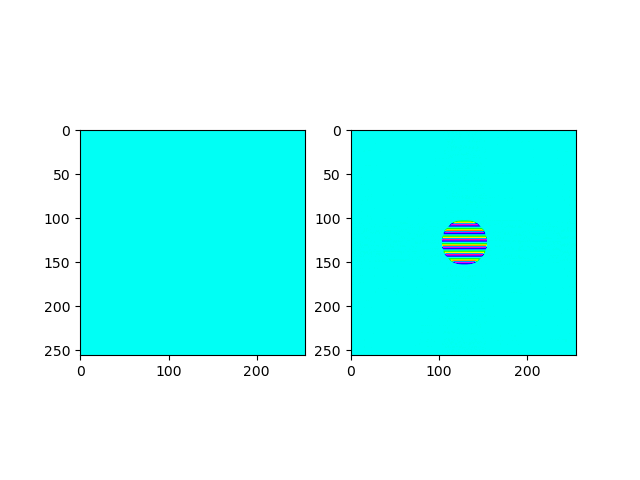

In [12]:
fix, ax = plt.subplots(1,2)

ax[0].imshow(
    np.fft.fftshift(np.angle(Psi0) *     np.abs(Psi0)),
    vmin = -np.pi,
    vmax = np.pi,
    cmap = "hsv",
)
ax[1].imshow(
    np.fft.fftshift(np.angle(Psi) *     np.abs(Psi)),
    vmin = -np.pi,
    vmax = np.pi,
    cmap = "hsv",
)



In [13]:
plt.close('all')
plt.ioff()
fig, ax = plt.subplots(2,2,figsize=(7,7))

dr = (3,0) # Angstroms

psi = np.fft.ifft2(
    np.fft.fft2(psi0)*np.exp(-2j*np.pi*(k_x*dr[0]+k_y*dr[1]))
)
Psi = np.fft.fft2(psi)

freq_phase = ax[0,1].imshow(
    np.fft.fftshift(np.angle(Psi) *     np.abs(Psi)),
    vmin = -np.pi,
    vmax = np.pi,
    cmap = "hsv",
)
ax[0,1].set_ylim((im_shape[1]/2-30,im_shape[1]/2+30))
ax[0,1].set_xlim((im_shape[1]/2-30,im_shape[1]/2+30))
freq_no_phase = ax[0,0].imshow(
    np.fft.fftshift(np.abs(Psi0)),
    vmin = -np.pi,
    vmax = np.pi,
    cmap = "hsv",
)
ax[0,0].set_xlim((im_shape[1]/2-30,im_shape[1]/2+30))
ax[0,0].set_ylim((im_shape[1]/2-30,im_shape[1]/2+30))
real_no_phase = ax[1,0].imshow(np.fft.fftshift(np.abs(psi0)))
real_phase = ax[1,1].imshow(np.fft.fftshift(np.abs(psi)))


# Plot Naming
ax[0,0].set_title("Reciprical Space no Shift Applied")
ax[0,1].set_title("Linear Phase Shift Applied")
ax[1,0].set_title("Probe")
ax[1,1].set_title("Probe w/ Linear Phase Shift")

ax[0,0].set_ylabel("$k_{y}$")
ax[0,0].set_xlabel("$k_{x}$")
ax[0,1].set_ylabel("$k_{y}$")
ax[0,1].set_xlabel("$k_{x}$")
ax[1,0].set_ylabel("y (Å)")
ax[1,0].set_xlabel("x (Å)")
ax[1,1].set_ylabel("y (Å)")
ax[1,1].set_xlabel("x (Å)")
ax[0,1].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
ax[0,0].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
ax[1,1].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
ax[1,0].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 



In [ ]:
phaseApplied = [0,0]



def update_y(change):
    phaseApplied[0] = change["new"]
    update_phase_plot()
def update_x(change):
    phaseApplied[1] = change["new"]
    update_phase_plot()
def update_phase_plot():
    dr = phaseApplied
    psi = np.fft.ifft2(
    np.fft.fft2(psi0)*np.exp(-2j*np.pi*(k_x*dr[0]+k_y*dr[1]))
    )
    Psi = np.fft.fft2(psi)
    
    real_phase.set_data(np.fft.fftshift(np.abs(psi)))
    
    freq_phase.set_data(np.fft.fftshift(np.angle(Psi) *     np.abs(Psi)))
    
    fig.canvas.draw_idle()
    return None
    


# Create frame slider
x_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=25,
    description='X',
    continuous_update=False,  # Only update when slider is released
    style = {'description_width': 'initial'},
    layout=widgets.Layout(width='300px'),
)

# Create frame slider
y_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=25,
    description='Y',
    continuous_update=False,  # Only update when slider is released
    style = {'description_width': 'initial'},
    layout=widgets.Layout(width='300px'),
)

x_slider.observe(update_x, names='value')
y_slider.observe(update_y, names="value")

controls = widgets.HBox([x_slider,y_slider])

player = widgets.VBox([controls, fig.canvas])

No such comm: 417922534b62441fac04bbb4e50763de


No such comm: 1fa27ff8d8bf4465bea7ba18717111dc


## Linear Phase Shift Translation

In [ ]:
# | label: app:linear_phase_shift
# Linear Phase Shift
display(player)